In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

100%|██████████| 346M/346M [00:02<00:00, 174MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


In [14]:
# Define the paths to the dataset directories
train_dir = '/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train'
test_dir = '/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_test/seg_test'

In [16]:
# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [17]:

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 714s 2s/step - accuracy: 0.4827 - loss: 1.3286 - val_accuracy: 0.6487 - val_loss: 0.9039
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 697s 2s/step - accuracy: 0.6809 - loss: 0.8489 - val_accuracy: 0.7330 - val_loss: 0.7291
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.7463 - loss: 0.7076 - val_accuracy: 0.7893 - val_loss: 0.5859
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.7753 - loss: 0.6279 - val_accuracy: 0.7963 - val_loss: 0.5756
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.8056 - loss: 0.5492 - val_accuracy: 0.8380 - val_loss: 0.4738
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 689s 2s/step - accuracy: 0.8091 - loss: 0.5307 - val_accuracy: 0.8490 - val_loss: 0.4489
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 696s 2s/step - accuracy: 0.8289 - loss: 0.4791 - val_accuracy: 0.8483 - val_loss: 0.4375
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.8422 - loss: 0.4574 - val_accu

In [18]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred_classes)
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

print(conf_matrix)
print(class_report)

94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 419ms/step - accuracy: 0.8592 - loss: 0.4484
Test Accuracy: 0.8633333444595337
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step
[[ 75  71  97  72  59  63]
 [ 74  72  96  81  59  92]
 [ 90  80 112 100  87  84]
 [ 77  78  87 121  67  95]
 [ 79  88  86 105  83  69]
 [ 85  83  79  88  82  84]]
              precision    recall  f1-score   support

   buildings       0.16      0.17      0.16       437
      forest       0.15      0.15      0.15       474
     glacier       0.20      0.20      0.20       553
    mountain       0.21      0.23      0.22       525
         sea       0.19      0.16      0.18       510
      street       0.17      0.17      0.17       501

    accuracy                           0.18      3000
   macro avg       0.18      0.18      0.18      3000
weighted avg       0.18      0.18      0.18      3000



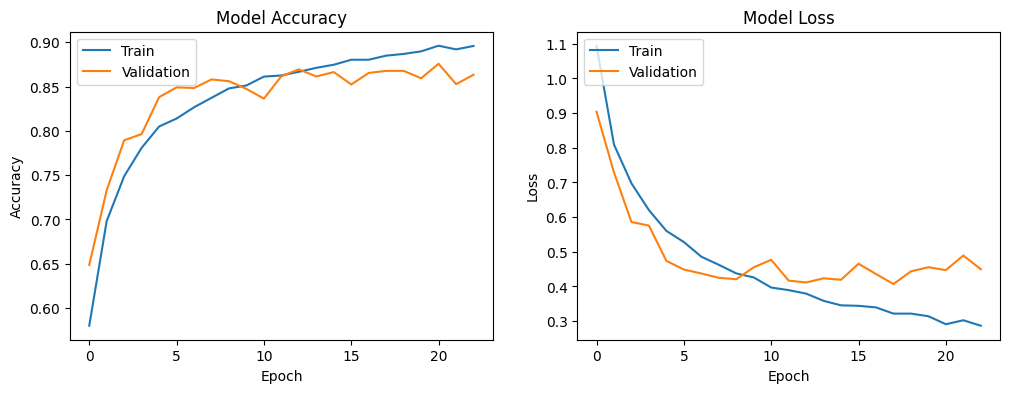

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()